# Normal probability plots using `scipy`

**date**
: 2021-04-16

**data**
: `accidents.csv`

**ref**
: Computer book B, Activity 18

**desc**
: Calculating large-sample confidence intervals for a **proportion.**

## Package imports

In [1]:
from scripts.data import Data
from scipy.stats import bernoulli, norm
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt

## Data import

Let us first load, preview, and describe the data.

In [2]:
accidents = Data.load_accidents()

In [3]:
accidents.head()

,Accidents
0,0
1,1
2,0
3,0
4,0


In [4]:
accidents.describe()

,Accidents
count,414.000000
mean,0.483092
std,1.005291
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,8.000000


Lets us see the frequency of number of accidents per week.

In [5]:
accidents_grouped = accidents.groupby(["Accidents"])[["Accidents"]].count()

In [6]:
accidents_grouped

,Accidents
Accidents,
0,296
1,74
2,26
3,8
4,4
5,4
6,1
8,1


Use `countplot()` to plot the distribution of the frequency of the number of accidents.

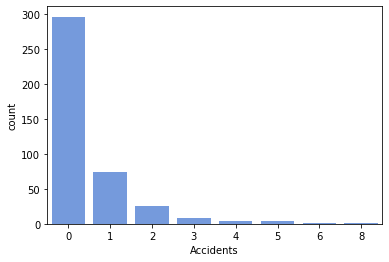

In [7]:
f, ax = plt.subplots()

sns.countplot(
       data=accidents,
       x="Accidents",
       color="cornflowerblue"
)

plt.show()

## Estimating the proportion

> Estimate the proportion of workers who experience one or more accidents, and obtain an approximate 99% confidence interval for this proportion.

Declare `p`

In [8]:
# count number of entries where accidents != 0
had_accidents = accidents.query('Accidents != 0')["Accidents"].count()

In [9]:
# count the number of rows in totals
sample_size = accidents["Accidents"].size

In [10]:
p = float(had_accidents/sample_size)

## Obtaining 99% CI

This is an example of a **Bernoulli trial**.
We will use `scipy.stats.bernoulli` and `scipy.stats.norm` to calculate in the interval.

In [11]:
# declare the bernoulli
a_bernoulli = bernoulli(p)

In [12]:
# get ste
ste = a_bernoulli.std()/sqrt(sample_size)

In [13]:
# declare the normal distribution
a_norm = norm(p, ste)

In [14]:
# 99% confidence interval
a_norm.interval(alpha=0.99)

(0.22787583995834104, 0.3421724692204029)